<a href="https://colab.research.google.com/github/yeesem/Data-Visualization/blob/main/Amazon_movie_%26_film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Amazon- Movies and Films.csv')

In [ ]:
df.head()

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN
3,3,Kelce,5.0,570,Prime Video,2023.0,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.columns

Index(['title', 'Movie_Rating', 'No_of_Ratings', 'Format', 'ReleaseYear',
       'MPAA_Rating', 'Directed_By', 'Starring', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2108 non-null   object 
 1   Movie_Rating   2108 non-null   float64
 2   No_of_Ratings  2108 non-null   int64  
 3   Format         2108 non-null   object 
 4   ReleaseYear    2069 non-null   float64
 5   MPAA_Rating    1378 non-null   object 
 6   Directed_By    2043 non-null   object 
 7   Starring       2107 non-null   object 
 8   Price          1011 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 148.3+ KB


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
print('Missing Values:\n',missing_values)

Missing Values:
 title               0
Movie_Rating        0
No_of_Ratings       0
Format              0
ReleaseYear        39
MPAA_Rating       730
Directed_By        65
Starring            1
Price            1097
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print('Missing values:\n',missing_values)

Missing values:
 title            0
Movie_Rating     0
No_of_Ratings    0
Format           0
ReleaseYear      0
MPAA_Rating      0
Directed_By      0
Starring         0
Price            0
dtype: int64


In [ ]:
df.describe()

,Movie_Rating,No_of_Ratings,ReleaseYear,Price
count,740.000000,740.000000,740.000000,740.000000
mean,4.548378,14227.771622,2008.308108,4.346635
std,0.219940,20868.953637,13.129507,2.631873
min,4.000000,8.000000,1948.000000,0.990000
25%,4.400000,2335.500000,2002.000000,3.790000
50%,4.600000,6497.000000,2011.000000,3.790000
75%,4.700000,16423.750000,2018.000000,3.990000
max,4.900000,142807.000000,2023.000000,24.990000


In [ ]:
unique_values = {}

#Select the columns base on the data types
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
  unique_values[column] = df[column].unique()

unique_values_df = pd.DataFrame.from_dict(unique_values,orient='index')

unique_values_df = unique_values_df.transpose()

unique_values_df

,title,Format,MPAA_Rating,Directed_By,Starring
0,Guy Ritchie's The Covenant,Prime Video,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr"
1,Those Who Wish Me Dead,None,PG-13,Taylor Sheridan,"Angelina Jolie,Nicholas Hoult,Jon Bernthal"
2,Renfield,None,PG,Chris McKay,"Nicholas Hoult,Nicolas Cage,Awkwafina"
3,Black Adam,None,G,Jaume Collet-Serra,"Dwayne Johnson,Aldis Hodge,Pierce Brosnan"
4,A Thousand and One,None,None,A.V. Rockwell,"Teyana Taylor,Will Catlett,Josiah Cross,Aven C..."
...,...,...,...,...,...
667,Ghostbusters,None,None,None,None
668,The Hunt for Red October,None,None,None,None
669,Jurassic World: Fallen Kingdom,None,None,None,None
670,Moana (Bonus Content),None,None,None,None


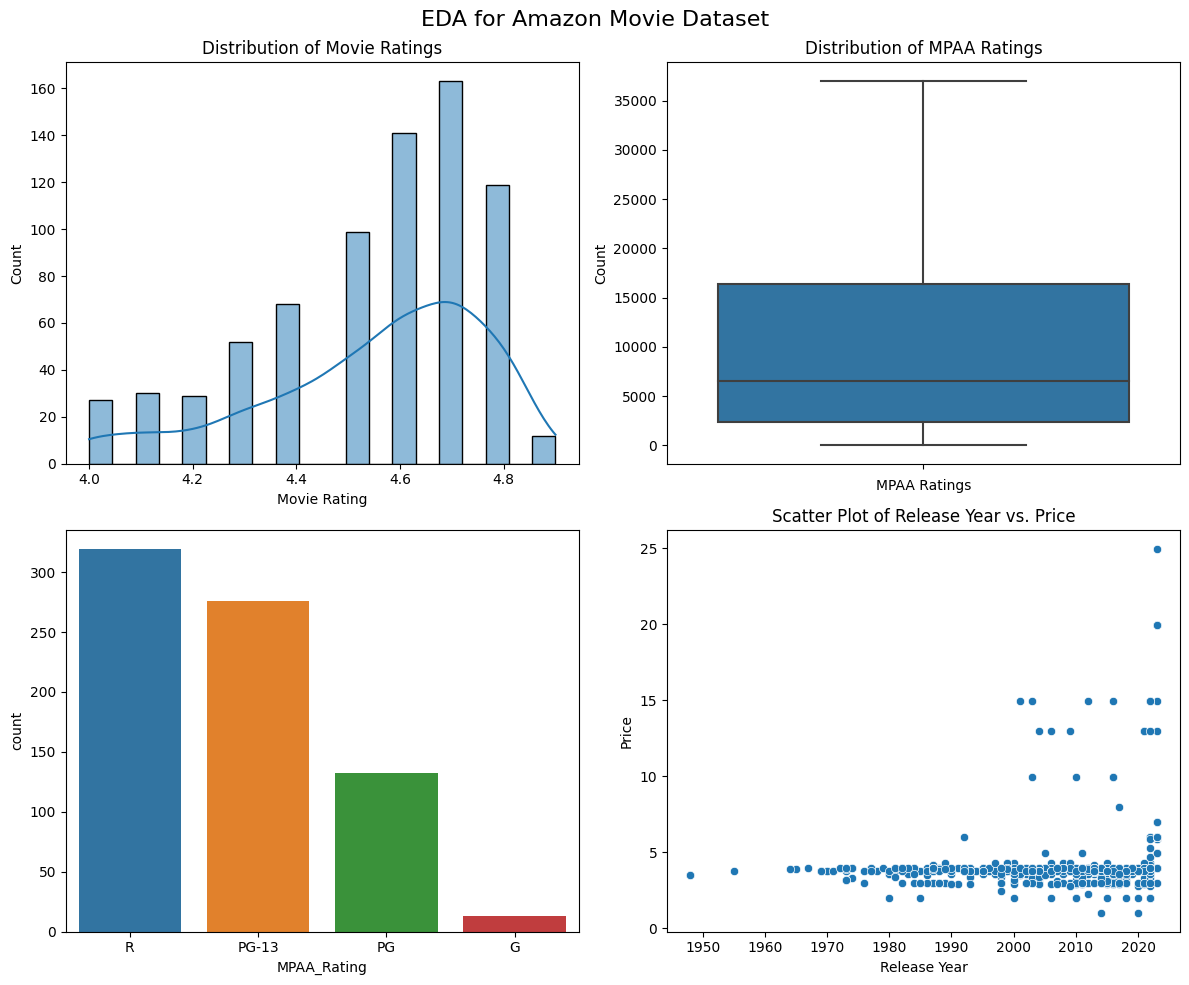

In [36]:
fig,axes = plt.subplots(2,2,figsize=(12,10))

#Plot 1:Histogram of Movie Ratings
sns.histplot(data=df,x = 'Movie_Rating',ax = axes[0,0],bins = 20,kde = True)
axes[0,0].set_title('Distribution of Movie Ratings')
axes[0,0].set_xlabel('Movie Rating')
axes[0,0].set_ylabel('Count')

#Plot 2:Boxplot of No_of_Ratings
#showfliers - display boxplot without outliers
sns.boxplot(data=df,y='No_of_Ratings',ax = axes[0,1],showfliers=False)
axes[0,1].set_title('Boxplot of Number of Ratings')
axes[0,1].set_ylabel('Number of Ratings')

#Plot 3:Barplot of MPAA Ratings
sns.countplot(data=df,x = 'MPAA_Rating',ax = axes[1,0])
axes[0,1].set_title('Distribution of MPAA Ratings')
axes[0,1].set_xlabel('MPAA Ratings')
axes[0,1].set_ylabel('Count')

#Plot 4:Scatterplot of ReleaseYear vs Price
sns.scatterplot(data=df,x = 'ReleaseYear',y='Price',ax = axes[1,1])
axes[1,1].set_title('Scatter Plot of Release Year vs. Price')
axes[1,1].set_xlabel('Release Year')
axes[1,1].set_ylabel('Price')

plt.suptitle('EDA for Amazon Movie Dataset',fontsize=16)
plt.tight_layout()

plt.show()

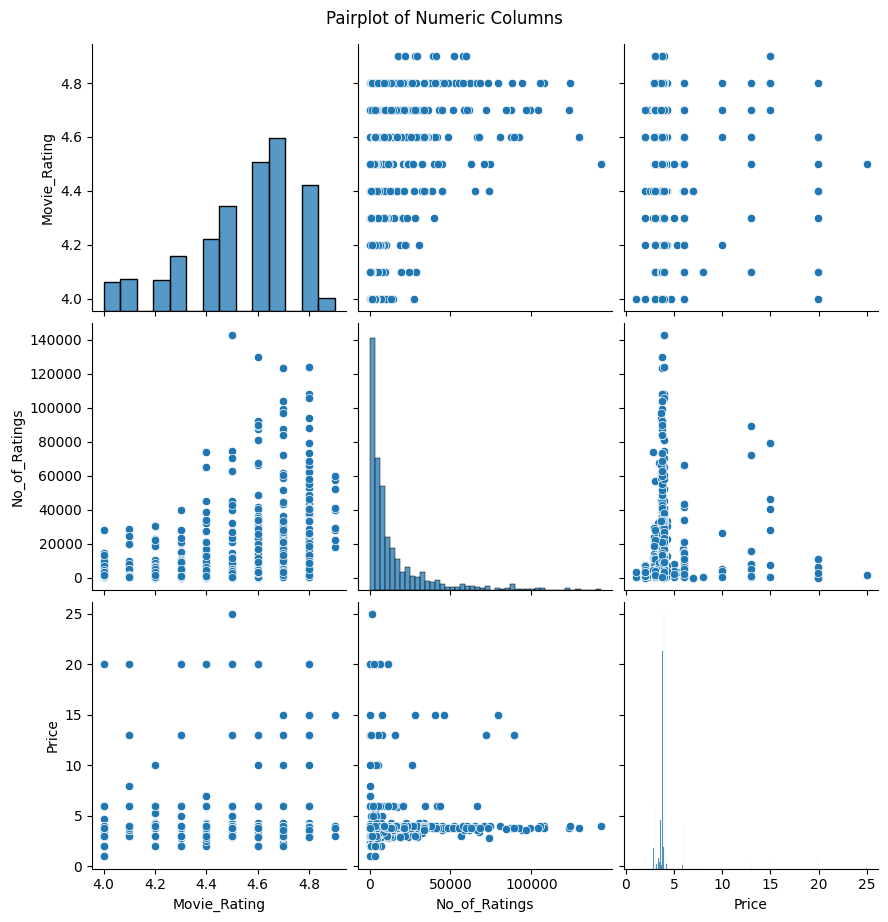

In [47]:
sns.pairplot(df[['Movie_Rating','No_of_Ratings','Price']],height=3)
plt.suptitle('Pairplot of Numeric Columns',y=1.02)
plt.show()

Text(0.5, 1.0, 'Distribution of Formats')

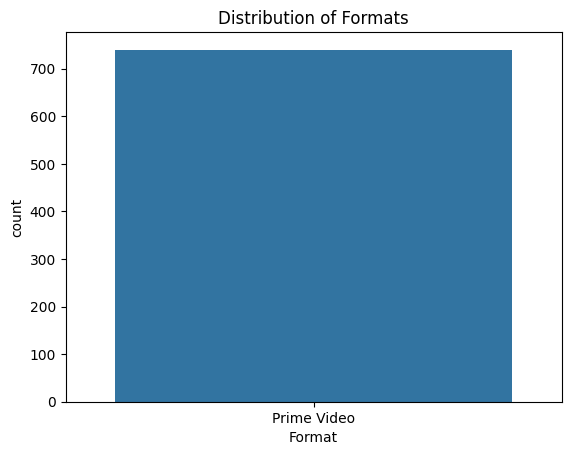

In [40]:
sns.countplot(data=df,x='Format')
plt.title('Distribution of Formats')

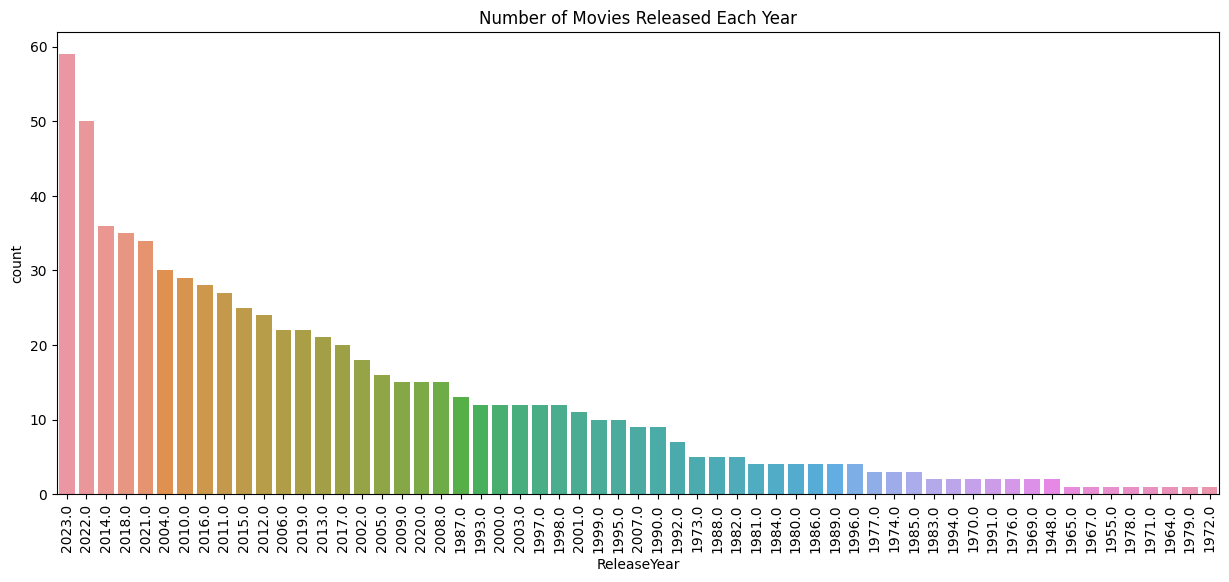

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='ReleaseYear',order=df['ReleaseYear'].value_counts().index)
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()